# **Ayudantía 3: Machine Learning**
**Profesor:** Juan Bekios
**Ayudante:** Francisco Meneses Villegas (francisco.meneses@alumnos.ucn.cl)

El objetivo de esta ayudantía es que usted como estudiante comprenda que es un tensor, como crearlos y cargarlos, para aplicar un algoritmo de regresión lineal

## **1. Tensores**

### ¿Qué es un Tensor?

Un **tensor** es una estructura matemática fundamental en machine learning y deep learning, utilizada para representar datos en diversas dimensiones. Esencialmente, es una generalización de las matrices a más dimensiones:

1. **Escalar (Tensor de orden 0)**: Un solo valor, como un número real. Ejemplo: \( a = 5 \).
2. **Vector (Tensor de orden 1)**: Una lista o arreglo de números. Ejemplo: \( v = [1, 2, 3] \).
3. **Matriz (Tensor de orden 2)**: Una tabla de números con filas y columnas. Ejemplo:

M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}


4. **Tensor de orden superior (orden 3 o más)**: Extensiones de las matrices en más dimensiones. Por ejemplo, un tensor de orden 3 podría representar una secuencia de imágenes o un conjunto de datos 3D.

Los tensores son esenciales porque permiten manejar datos de manera eficiente para los modelos de deep learning, como los de redes neuronales, donde los pesos, los datos de entrada y las salidas se representan en forma de tensores. Las operaciones sobre estos tensores son altamente optimizadas en librerías como TensorFlow y PyTorch.

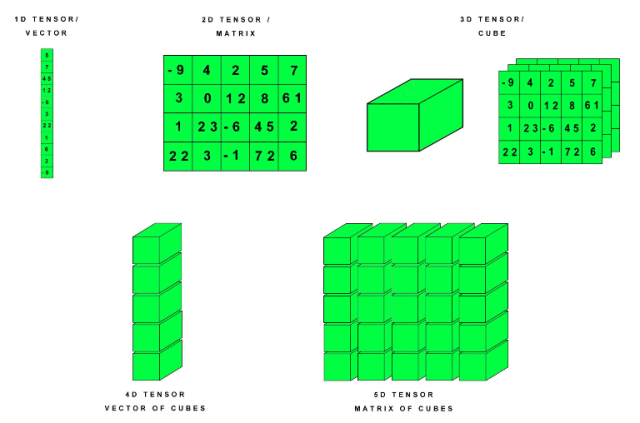


In [2]:
import torch
import numpy as np

In [3]:
# Crear un tensor vacío: No inicializado

x = torch.empty(1) # escalar


#x = torch.empty(3) # vector, 1D

#x = torch.empty(2,3) # matriz, 2D

#x = torch.empty(2,2,3) # tensor, 3 dimensions

#x = torch.empty(2,2,2,3) # tensor, 4 dimensions


In [4]:
# Lista python construir un tensor
list = [[1,2], [3, 4], [5, 6]]
tensor1 = torch.tensor(list)

print(tensor1)
print(tensor1.shape)


# Crear un tensor de una lista
#tensor2 = torch.tensor([[1,2], [3, 4], [5, 6]])
#print(tensor2)

# Crear un tensor a partir de una matriz numpy
#imagen = np.array([1,2,3,4])
#tensor3 = torch.tensor(imagen)
#print(tensor3)
#print(tensor3.shape)

# Torch tensor de números aleatorios
#tensor4 = torch.rand(2,3)
#print(tensor4)
#print(tensor4.shape)


tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])


In [5]:
print(tensor1.size()) #Para ver la estructura del tensor

torch.Size([3, 2])


Para acceder a los elementos del tensor, se hace de forma similar que en numpy

In [6]:
print(tensor1)
print(tensor1[1]) # Obtengo la fila dos de el tensor (completa)
print(tensor1[1,1]) # Obtengo el elemento de la posición de la fila 2 y columna 2

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([3, 4])
tensor(4)


## 2. **CUDA**

Se utilizan los nucleos CUDA para trabajar con la GPU

In [7]:
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
0
Tesla T4


### 2.1 **Tiempo de ejecución en CPU**

In [8]:
%%time
# Tiempo CPU
for i in range(500):
  x = torch.randn(1000, 1000)
  y = torch.randn(1000, 1000)
  z = torch.matmul(x, y)

CPU times: user 23.8 s, sys: 874 ms, total: 24.6 s
Wall time: 25.8 s


### 2.2 **Tiempo de ejecución en GPU**

In [9]:
%%time
# Tiempo GPU
cuda0 = torch.device('cuda:0')
for i in range(500):
  x = torch.randn(1000, 1000, device=cuda0)
  y = torch.randn(1000, 1000, device=cuda0)
  z = torch.matmul(x, y)

CPU times: user 140 ms, sys: 248 ms, total: 388 ms
Wall time: 664 ms


## 3. **Regresión Lineal**

### 3.1 Regresión Lineal (I)

Se realiza el cálculo de una regresión lineal por medio del cálculo manual de los gradientes (derivada de la función de pérdida).

Como ejemplo utilizaremos base de datos muy simple. La hipótesis será lineal:

$$y = \theta_0 \cdot x$$

Sin intercepto o _bias_ para simplificar el problema y explicarlo con claridad.

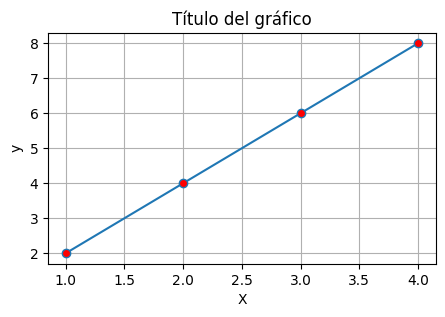

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

plt.plot(X, y, marker='o', markerfacecolor='red')
plt.title('Título del gráfico')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)

### 3.1.1 Regresión lineal utilizando descenso de gradiente

Para calcular una regresión lineal utilizando **descenso de gradiente** debemos contar con los siguientes constructos:

*  **Hipótesis:** Función de lineal, para el ejemplo nuestra hipótesis será: $$\hat{y}=\theta_0 \cdot x$$ Es la fución que hace la predicción una vez que fueron aprendidos los parámetros, también se denota como: $$\hat{y}=h_\theta(x)$$

*  **Función de pérdida**: Error cuadrático medio (MSE, _mean squared error_), $$l(y,\hat{y})=\frac{1}{N}\cdot (y -\hat{y})^2$$

*  **Derivada de la función de pérdida**: $$\frac{dl}{d\theta_0} = \frac{1}{N}\cdot 2x(\theta_0 x - y)$$

In [11]:
import numpy as np

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

# Inicializo con cualquier valor los tetas (W)
W = 0.0

# Hipótesis: Lineal (f(x)=w*x)
def forward(x):
  return W * x

# Loss: MSE
def loss(y, y_pred):
  return ((y - y_pred)**2).mean()

# Gradiente
# L = MSE = 1/N * (w*x - y) ** 2
# dL/dW = 1/N * 2x(w*x -y)
def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred - y).mean()

print(f'Predicción antes de entrenar: f(5) = {forward(5):.3f}')

Predicción antes de entrenar: f(5) = 0.000


In [12]:
# Entrenar nuestro modelo: Descenso de gradiente.
learning_rate = 0.01
n_iter = 20

for epoch in range(n_iter):
  # Prediccion
  y_pred = forward(X)

  # Error
  l = loss(y, y_pred)

  # Calculo de gradientes
  dw = gradient(X, y, y_pred)

  # Actualizar los pesos
  W = W - learning_rate * dw

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: w = {W:.3f}, loss = {l:.8f}')

print(f'Predicción después de entrenar: f(5) = {forward(5):.3f}')

epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050331
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Predicción después de entrenar: f(5) = 10.000


### 3.2 Regresión lineal (II):

En este caso se realiza el cálculo de los parámetros de la regresión lineal por medio del cálculo manual de los gradientes (derivada de la función de pérdida).

In [13]:
import torch

# Pasar todos los vectores a tensores
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# Salida modelo (prediccion del modelo)
def forward(x):
  return x * w

# loss = MSE
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

print(f'Prediccion antes del entrenamiento: f(5) = {forward(5).item():.3f}')

Prediccion antes del entrenamiento: f(5) = 0.000


In [14]:
# Fase: Entrenamiento
learning_rate = 0.01
n_iter = 50

for epoch in range(n_iter):
  # 1. Prediccion
  y_pred = forward(X)

  # 2. Calcular error
  l = loss(y, y_pred)

  # 3. Calcular los gradientes
  l.backward()

  # 4. Actualizar los pesos
  with torch.no_grad():
    w -= learning_rate * w.grad # w = w - learning_rate * w.grad

  # 5. Dejar en zero los valores de gradiente de w
  w.grad.zero_()

  if epoch % 3 == 0:
    print(f'epoch {epoch}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Predicción después de entrenar: f(5) = {forward(5).item():.3f}')

epoch 0: w = 0.300, loss = 30.00000000
epoch 3: w = 0.956, loss = 11.31448650
epoch 6: w = 1.359, loss = 4.26725292
epoch 9: w = 1.606, loss = 1.60939169
epoch 12: w = 1.758, loss = 0.60698116
epoch 15: w = 1.851, loss = 0.22892261
epoch 18: w = 1.909, loss = 0.08633806
epoch 21: w = 1.944, loss = 0.03256231
epoch 24: w = 1.966, loss = 0.01228084
epoch 27: w = 1.979, loss = 0.00463169
epoch 30: w = 1.987, loss = 0.00174685
epoch 33: w = 1.992, loss = 0.00065882
epoch 36: w = 1.995, loss = 0.00024848
epoch 39: w = 1.997, loss = 0.00009371
epoch 42: w = 1.998, loss = 0.00003534
epoch 45: w = 1.999, loss = 0.00001333
epoch 48: w = 1.999, loss = 0.00000503
Predicción después de entrenar: f(5) = 9.997


### 3.3 Regresión lineal (III):

Cálculo de los parámetros de la regresión lineal utilizando Pytorch (derivada de la función de pérdida).

In [15]:
import torch # Librerias base
import torch.nn as nn # Construir los modelos
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def gradiente_descent(X, y, iters=10):
  n_samples, n_features = X.shape

  # 1.1) Defino la hipotesis
  input_size = n_features
  output_size = 1
  model = nn.Linear(input_size, output_size, bias=False)

  # 1.2) Funcion de perdida y configurar los parametros del optimizador
  learning_rate = 0.01
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # 1.3) Ciclo de entrenamiento
  num_epochs = iters
  for epoch in range(num_epochs):
    # Calcular la prediccion
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Actualiza el modelo
    loss.backward() #Calcular los gradientes
    optimizer.step()

    # Dejar los gradientes en cero
    optimizer.zero_grad()

    if epoch % 2 == 0:
      print(f'epoch {epoch}:  loss = {loss.item():.8f}')

  return model

In [17]:
def plot_fit(X_numpy, y_numpy, y_pred):
  plt.plot(X_numpy, y_numpy, 'ro', label='$Y_{real}$')
  plt.plot(X_numpy, y_pred, 'bo', label='$Y_{estimado}$')
  plt.xlabel('X - Variable Independiente')
  plt.ylabel('Y - Variable Dependiente')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()

## 4. **Visualización del Descenso del Gradiente**

epoch 0:  loss = 6277.51953125


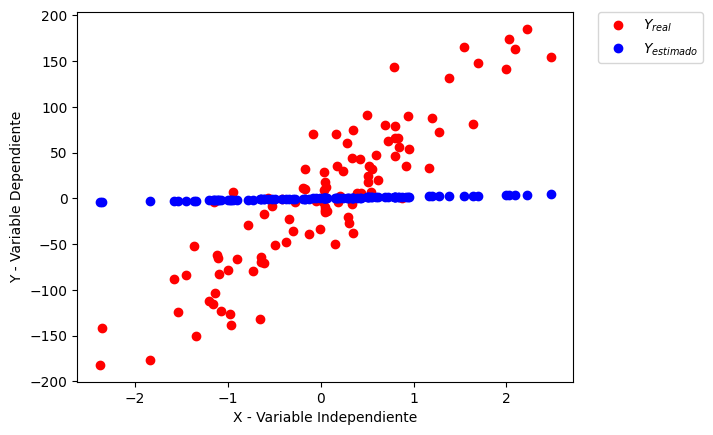

In [18]:
from sklearn import datasets
#import matplotlib.pyplot as plt

# 0) Cargar datos
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=40, random_state=4)

# cast a Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

# 1) Entrenamiento
model = gradiente_descent(X, y, iters=1)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6283.47802734
epoch 2:  loss = 5906.00244141
epoch 4:  loss = 5556.34570312


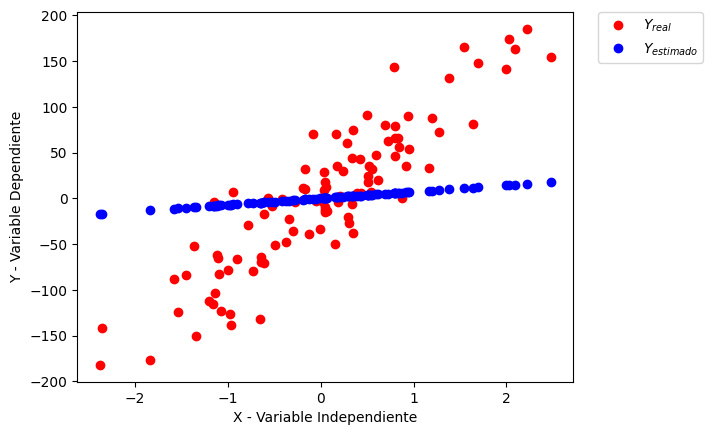

In [19]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=5)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6458.52636719
epoch 2:  loss = 6068.15039062
epoch 4:  loss = 5706.54394531
epoch 6:  loss = 5371.58544922
epoch 8:  loss = 5061.31298828
epoch 10:  loss = 4773.90576172
epoch 12:  loss = 4507.67919922
epoch 14:  loss = 4261.07226562
epoch 16:  loss = 4032.63940430
epoch 18:  loss = 3821.04052734


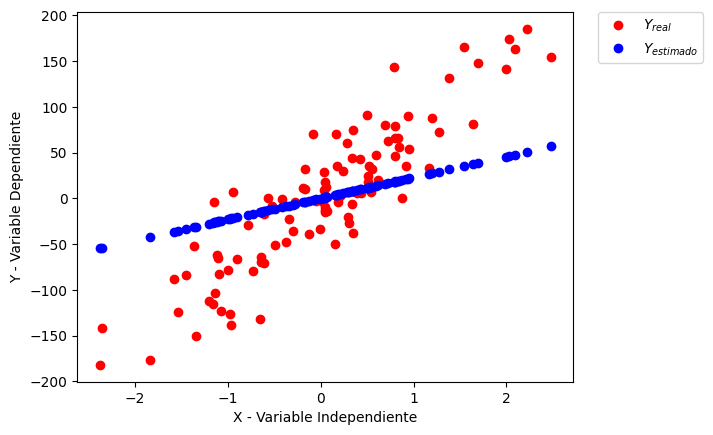

In [20]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=20)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6228.47705078
epoch 2:  loss = 5855.05419922
epoch 4:  loss = 5509.15185547
epoch 6:  loss = 5188.74072266
epoch 8:  loss = 4891.94287109
epoch 10:  loss = 4617.01757812
epoch 12:  loss = 4362.35302734
epoch 14:  loss = 4126.45605469
epoch 16:  loss = 3907.94311523
epoch 18:  loss = 3705.53442383
epoch 20:  loss = 3518.04199219
epoch 22:  loss = 3344.36694336
epoch 24:  loss = 3183.49072266
epoch 26:  loss = 3034.47070312
epoch 28:  loss = 2896.43286133
epoch 30:  loss = 2768.56738281
epoch 32:  loss = 2650.12475586
epoch 34:  loss = 2540.41162109
epoch 36:  loss = 2438.78369141
epoch 38:  loss = 2344.64526367
epoch 40:  loss = 2257.44458008
epoch 42:  loss = 2176.66967773
epoch 44:  loss = 2101.84814453
epoch 46:  loss = 2032.53979492
epoch 48:  loss = 1968.33947754
epoch 50:  loss = 1908.87097168
epoch 52:  loss = 1853.78454590
epoch 54:  loss = 1802.75781250
epoch 56:  loss = 1755.49145508
epoch 58:  loss = 1711.70825195
epoch 60:  loss = 1671.15197754
epoch 62:  lo

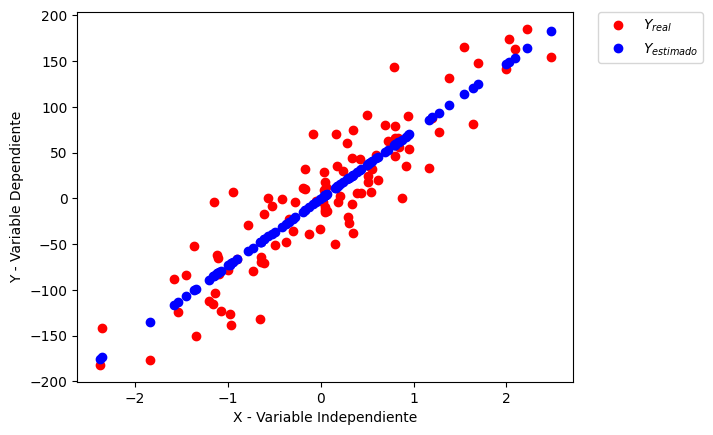

In [21]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=300)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

## 5. Ejercicios

Dada la siguiente red neuronal:
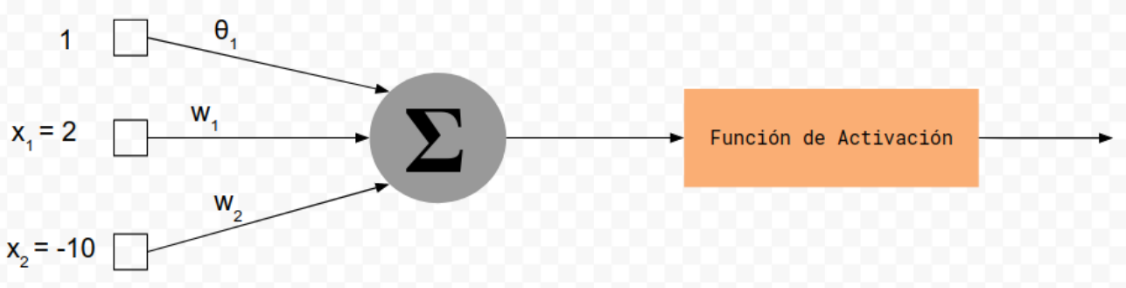

### Se pide:

1. Probar 100.000 vectores de pesos ($w$) generados al azar y encuentre el modelo que mejor se ajusta a los datos de entrenamiento (dataset).
2. Grafique los valores de los pesos (parámetros) obtenidos vs la pérdida obtenida.
3. Encontrar los mejores parámetros del modelo utilizando el método de regresión lineal por mínimos cuadrados.
4. Encontrar los mejores parámetros del modelo utilizando el método de descenso de gradiente para regresión lineal.
5. Graficar los parámetros obtenidos en cada iteración vs el valor de la función de pérdida.


## Dataset

| $x_1$ | $x_2$ | $y$ |
|-------|-------|-----|
| 1.0   | 1.5   | 3.0 |
| 2.7   | 2.2   | 4.0 |
| 3.2   | 3.3   | 5.0 |
| 4.1   | 4.0   | 6.0 |
| 5.0   | 5.2   | 7.0 |
| 6.1   | 6.3   | 8.0 |
| 7.4   | 7.9   | 9.0 |

Escriba el programa en Python, utilice GPU y una representación matricial para poder resolver el problema.

Considere mínimos cuadrados como función de pérdida ($loss$).

### 5.1 Probar 100.000 vectores de pesos ($w$) generados al azar y encuentre el modelo que mejor se ajusta a los datos de entrenamiento (dataset).


In [22]:
#preparo la primera matriz
cuda0 = torch.device('cuda:0')
w = torch.randn(100000, 3, device=cuda0)
print(w)

tensor([[-0.4757,  1.1627,  2.1088],
        [ 0.3875, -1.2962,  1.3579],
        [-1.5969, -1.0375,  0.2310],
        ...,
        [-1.3740,  0.0756, -1.4220],
        [ 0.7704, -0.2208,  0.3838],
        [-1.6954, -1.2947, -0.0961]], device='cuda:0')


In [23]:
#preparo el dataset como matriz
matriz_x = [[1.0, 1.5, 1.0], [2.7, 2.2, 1.0], [3.2, 3.3, 1.0], [4.1, 4.0, 1.0], [5.0, 5.2, 1.0], [6.1, 6.3, 1.0], [7.4, 7.9, 1.0]]
matriz_y = [[3.0], [4.0], [5.0], [6.0], [7.0], [8.0], [9.0]]
x = torch.tensor(matriz_x)
y = torch.tensor(matriz_y)

print(x)
print(y)

tensor([[1.0000, 1.5000, 1.0000],
        [2.7000, 2.2000, 1.0000],
        [3.2000, 3.3000, 1.0000],
        [4.1000, 4.0000, 1.0000],
        [5.0000, 5.2000, 1.0000],
        [6.1000, 6.3000, 1.0000],
        [7.4000, 7.9000, 1.0000]])
tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])


In [24]:
#traspongo la matriz generada inicialmente
x = x.to(device=cuda0)
y = y.to(device=cuda0)

w_transpuesta = w.t()

print(w_transpuesta)

tensor([[-0.4757,  0.3875, -1.5969,  ..., -1.3740,  0.7704, -1.6954],
        [ 1.1627, -1.2962, -1.0375,  ...,  0.0756, -0.2208, -1.2947],
        [ 2.1088,  1.3579,  0.2310,  ..., -1.4220,  0.3838, -0.0961]],
       device='cuda:0')


In [25]:
#multiplico las matrices para obtener el primer modelo
primer_modelo = x.matmul(w_transpuesta)

print(primer_modelo)

tensor([[  3.3771,  -0.1989,  -2.9221,  ...,  -2.6827,   0.8229,  -3.7335],
        [  3.3823,  -0.4474,  -6.3630,  ...,  -4.9656,   1.9780,  -7.5219],
        [  4.4234,  -1.6794,  -8.3027,  ...,  -5.5694,   2.1203,  -9.7938],
        ...,
        [  5.7763,  -3.4446, -13.1484,  ...,  -7.8990,   3.0874, -15.3054],
        [  6.5320,  -4.4441, -16.0462,  ...,  -9.3273,   3.6919, -18.5944],
        [  7.7739,  -6.0142, -19.7821,  ..., -10.9926,   4.3401, -22.8699]],
       device='cuda:0')


In [26]:
#obtengo el error y el error cuadrado
error = primer_modelo-y
ecuad = error * error
print(ecuad.mean(0))

tensor([  1.0614,  90.2665, 343.3070,  ..., 186.9924,  11.9807, 421.3741],
       device='cuda:0')


### 5.2 Grafique los valores de los pesos (parámetros) obtenidos vs la pérdida obtenida.


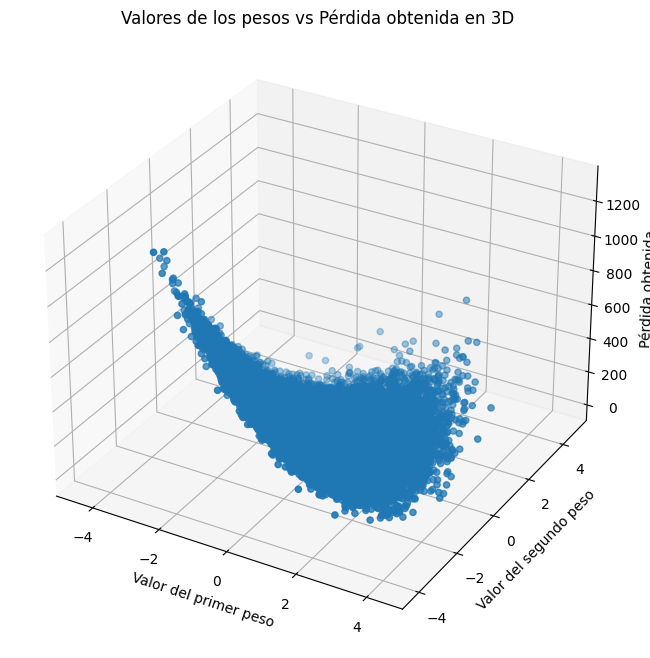

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convertir la pérdida obtenida a un arreglo numpy para su graficación
perdida_promedio = ecuad.mean(0).cpu().numpy()

# Obtener los valores de los pesos para cada dimensión
valores_pesos = w.cpu().numpy()

# Graficar los valores de los pesos vs la pérdida obtenida en un solo gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(valores_pesos[:, 0], valores_pesos[:, 1], perdida_promedio)

ax.set_xlabel('Valor del primer peso')
ax.set_ylabel('Valor del segundo peso')
ax.set_zlabel('Pérdida obtenida')
ax.set_title('Valores de los pesos vs Pérdida obtenida en 3D')
plt.show()

### 5.3 Encontrar los mejores parámetros del modelo utilizando el método de regresión lineal por mínimos cuadrados.


In [28]:
# Implementación del problema
import torch

# Convertir la matriz de características x a un tensor de PyTorch
X = torch.tensor(matriz_x)

# Convertir el vector de etiquetas y a un tensor de PyTorch
y = torch.tensor(matriz_y)

# Calcular los parámetros de la regresión lineal por mínimos cuadrados
XTX_inv = torch.linalg.inv(X.T @ X)  # Calcula la inversa de X^T * X
XTy = X.T @ y  # Calcula X^T * y
w_ls = XTX_inv @ XTy  # Calcula los parámetros de regresión

print("Parámetros del modelo (por mínimos cuadrados):")
print(w_ls)

Parámetros del modelo (por mínimos cuadrados):
tensor([[0.5042],
        [0.4692],
        [1.8377]])


### 5.4 Encontrar los mejores parámetros del modelo utilizando el método de descenso de gradiente para regresión lineal.

In [29]:
# Convertir la matriz de características x a un tensor de PyTorch
X = torch.tensor(matriz_x, dtype=torch.float32)

# Convertir el vector de etiquetas y a un tensor de PyTorch
y = torch.tensor(matriz_y, dtype=torch.float32)

# Inicializar los pesos aleatoriamente
w = torch.randn(3, requires_grad=True)

# Definir la tasa de aprendizaje y el número de iteraciones
learning_rate = 0.01
n_iter = 1000

# Listas para almacenar los valores de los parámetros y la pérdida en cada iteración
losses = []
weights = []

# Definir la función de pérdida (error cuadrático medio)
def loss(y, y_pred):
    return ((y_pred - y) ** 2).mean()

# Entrenamiento utilizando descenso de gradiente
for epoch in range(n_iter):
    # Calcular la predicción
    y_pred = X.matmul(w)

    # Calcular el error
    l = loss(y, y_pred)

    # Calcular los gradientes
    l.backward()

    # Actualizar los pesos
    with torch.no_grad():
        w -= learning_rate * w.grad

    # Reiniciar los gradientes
    w.grad.zero_()

    # Registrar los valores de los parámetros y la pérdida
    losses.append(l.item())
    weights.append(w.detach().numpy().copy())

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {l.item()}')

# Convertir las listas a matrices numpy para trazar
losses = np.array(losses)
weights = np.array(weights)

Epoch 0: Loss = 15.032225608825684
Epoch 100: Loss = 9.182242393493652
Epoch 200: Loss = 6.523174285888672
Epoch 300: Loss = 5.244907855987549
Epoch 400: Loss = 4.627601146697998
Epoch 500: Loss = 4.3271589279174805
Epoch 600: Loss = 4.179019451141357
Epoch 700: Loss = 4.10441255569458
Epoch 800: Loss = 4.065582275390625
Epoch 900: Loss = 4.044380187988281


### 5.5 Graficar los parámetros entre cada iteración y la pérdida obtenida

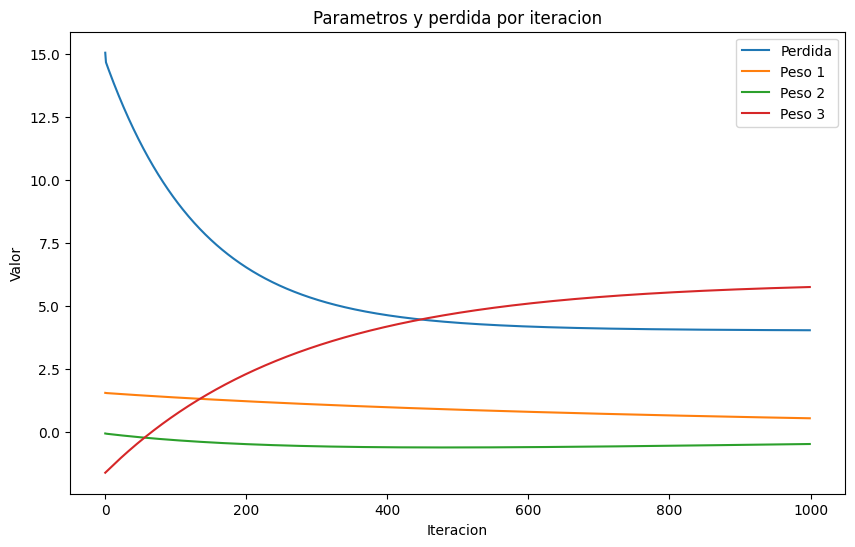

Mejores parámetros del modelo (por descenso de gradiente):
tensor([ 0.5430, -0.4769,  5.7452], requires_grad=True)


In [30]:
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Perdida')
for i in range(weights.shape[1]):
    plt.plot(weights[:, i], label=f'Peso {i+1}')
plt.xlabel('Iteracion')
plt.ylabel('Valor')
plt.legend()
plt.title('Parametros y perdida por iteracion')
plt.show()

print("Mejores parámetros del modelo (por descenso de gradiente):")
print(w)